In [1]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

import arviz as az

In [2]:
az.style.use('arviz-white')

# Convergence diagnostics for a ill-posed model

### Chapter 3.4: Diagnosing and improving convergence

In this example the chains **do not converge** and we show how the convergence diagnostics flag non-convergence.  The model is contrived to give poor convergence.  It is

$$\mu_1,\mu_2\sim\mbox{Normal}(0,1000)$$
$$Y\sim\mbox{Poisson}(\exp[\mu_1+\mu_2])$$


This is a silly model because there is only one observation, $Y=1$, and two parameters.  Further, the two parameter give the same likelihood for all combinations of $\mu_1$ and $\mu_2$ that give the same sum.

In [3]:
with pm.Model() as model:
    # Priors
    μ = pm.Normal('μ', 0, 1000, shape=2)
    #likelihood
    y = pm.Poisson('y', np.exp(μ[0] + μ[1]), observed=[1])
    samples = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [μ]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:45<00:00, 65.41draws/s] 
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 63 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6017554514907412, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


As in this example we are using NUTS, instead of Metropolis-Hastings, we also get warning about [divergences](https://docs.pymc.io/notebooks/Diagnosing_biased_Inference_with_Divergences.html). Divergences are also plotted by default as black lines at the bottom of the _trace plot_.

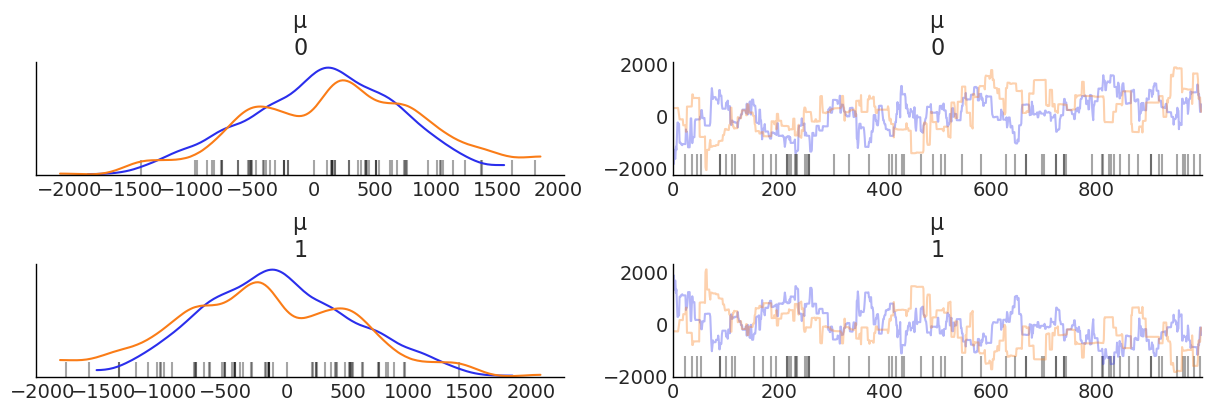

In [4]:
az.plot_trace(samples);

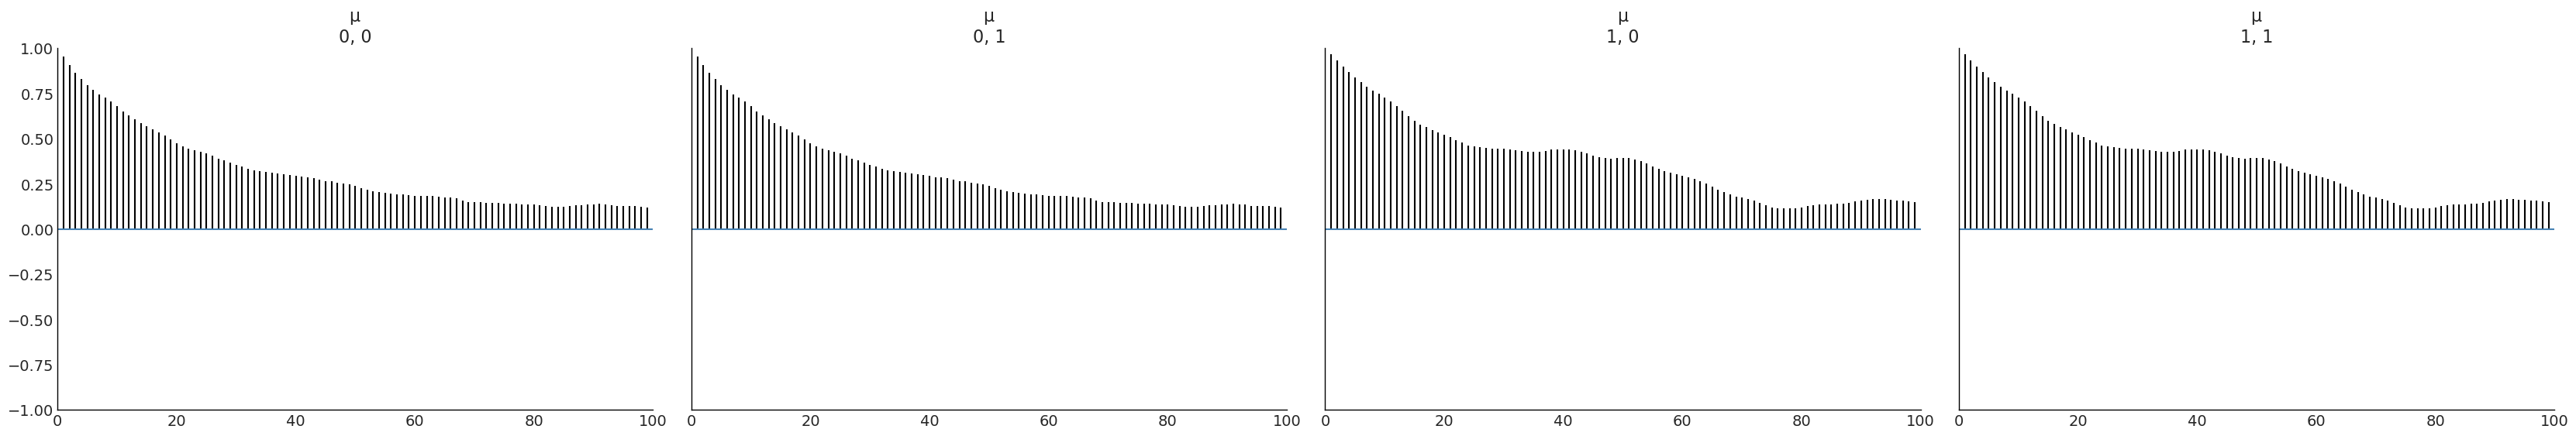

In [5]:
az.plot_autocorr(samples);

In [6]:
az.ess(samples).to_dataframe()

,μ
μ_dim_0,
0,6.993702
1,6.991760


In [7]:
# R greater than 1.01 indicates poor convergence
az.rhat(samples).to_dataframe()

,μ
μ_dim_0,
0,1.259916
1,1.260027
